This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
import tensorflow as tf
x = tf.ones((2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [6]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.5592829 ]
 [ 0.06662533]
 [ 0.36382106]], shape=(3, 1), dtype=float32)


In [7]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.11877072]
 [0.81383   ]
 [0.65752316]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [10]:
#Numpy는 수정이 가능 (Assignable)
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [9]:
#tensorflow는 unassignalbe하기 때문에 값 수정이 불가 -> 그래서 에러가 난다
x = tf.ones(shape=(2,2))
x[0,0]=0
print(x)

TypeError: ignored

**Creating a TensorFlow variable**

In [14]:
#tf.Variable은 수정이 가능하다 (Assignable)
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5879851 ],
       [ 0.40351915],
       [-0.97156733]], dtype=float32)>


In [13]:
v = tf.Variable(initial_value = tf.random.uniform((2,1)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.06883049],
       [0.38449025]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [15]:
#메서드 'assign'은 수정하게 해주는 메서드 : 모든 원소를 1로 바꾸도록 tf.ones이용
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [19]:
#0행 0열의 원소를 3으로 바꿈
v[0, 0].assign(3.)
v[1,0].assign(5.0)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [5.],
       [1.]], dtype=float32)>

In [21]:
#위의 두 행렬을 더하기
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [7.],
       [3.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [22]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [23]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
#result를 input_var에 대하여 미분하기

**Using `GradientTape` with constant tensor inputs**

In [24]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [27]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    y = tf.sqrt(input_const)
dydc = tape.gradient(y,input_const)
#dydc를 dy/dc로 했더니 연산자 '/'를 사용했다고 오류남

**Using nested gradient tapes to compute second-order gradients**

In [28]:
#두번 미분하기
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [30]:
# np.normal.multivariate_normal -> 다변량 정규 분포에서 랜덤 표본을 추출
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [31]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [32]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

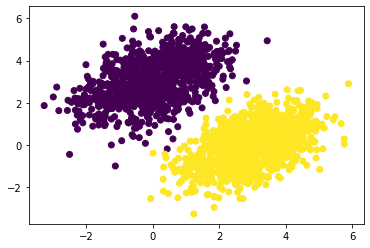

In [33]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [42]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [43]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [44]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
#tf.reduce_mean -> 원소 값을 다 더하여 원소 개수로 나누는 함수

**The training step function**

In [45]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [46]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.6344
Loss at step 1: 0.6580
Loss at step 2: 0.2125
Loss at step 3: 0.1532
Loss at step 4: 0.1372
Loss at step 5: 0.1267
Loss at step 6: 0.1176
Loss at step 7: 0.1094
Loss at step 8: 0.1019
Loss at step 9: 0.0951
Loss at step 10: 0.0889
Loss at step 11: 0.0833
Loss at step 12: 0.0781
Loss at step 13: 0.0734
Loss at step 14: 0.0692
Loss at step 15: 0.0653
Loss at step 16: 0.0618
Loss at step 17: 0.0585
Loss at step 18: 0.0556
Loss at step 19: 0.0529
Loss at step 20: 0.0505
Loss at step 21: 0.0483
Loss at step 22: 0.0463
Loss at step 23: 0.0445
Loss at step 24: 0.0428
Loss at step 25: 0.0413
Loss at step 26: 0.0399
Loss at step 27: 0.0386
Loss at step 28: 0.0375
Loss at step 29: 0.0364
Loss at step 30: 0.0355
Loss at step 31: 0.0346
Loss at step 32: 0.0338
Loss at step 33: 0.0331
Loss at step 34: 0.0324
Loss at step 35: 0.0318
Loss at step 36: 0.0313
Loss at step 37: 0.0308
Loss at step 38: 0.0304
Loss at step 39: 0.0300


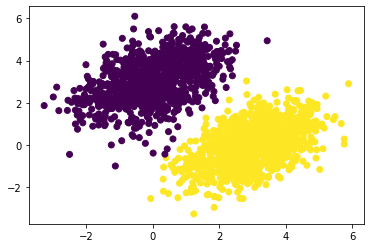

In [47]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

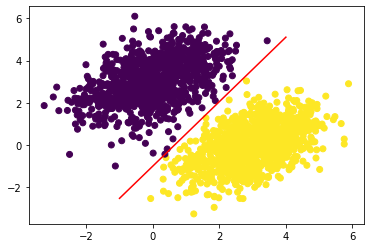

In [48]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [49]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [50]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [51]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [53]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [54]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [55]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [61]:
#연습해본 코드
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics =["accuracy"])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [56]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 17.1457 - binary_accuracy: 0.0155
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 16.6334 - binary_accuracy: 0.0155
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 16.2009 - binary_accuracy: 0.0155
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 15.7810 - binary_accuracy: 0.0155
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 15.3664 - binary_accuracy: 0.0155


In [57]:
history.history

{'binary_accuracy': [0.01549999974668026,
  0.01549999974668026,
  0.01549999974668026,
  0.01549999974668026,
  0.01549999974668026],
 'loss': [17.145706176757812,
  16.63341522216797,
  16.200916290283203,
  15.780996322631836,
  15.366443634033203]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 2s 11ms/step - loss: 0.3388 - binary_accuracy: 0.8900 - val_loss: 0.0423 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 1s 9ms/step - loss: 0.0782 - binary_accuracy: 0.9571 - val_loss: 0.0301 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0759 - binary_accuracy: 0.9514 - val_loss: 0.0773 - val_binary_accuracy: 0.9733
Epoch 4/5
88/88 [==============================] - 1s 9ms/step - loss: 0.0728 - binary_accuracy: 0.9557 - val_loss: 0.1743 - val_binary_accuracy: 0.7417
Epoch 5/5
88/88 [==============================] - 1s 9ms/step - loss: 0.0773 - binary_accuracy: 0.9493 - val_loss: 0.2105 - val_binary_accuracy: 0.7350


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.5683167 ]
 [ 0.66970116]
 [ 0.40898955]
 [-0.54658675]
 [-0.00754219]
 [ 0.5515623 ]
 [ 0.16291836]
 [-0.6513659 ]
 [ 0.05568045]
 [ 0.64467394]]


## Summary